<a href="https://colab.research.google.com/github/RickyHRazzaq/Classification-Goods-in-Ecommerce-Using-Text-Data/blob/main/Classification_of_Goods_Based_on_Ecommerce_Text_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

This is the classification task projects based on E-commerce text dataset for 4 categories - "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.

The dataset is in ".csv" format with two columns. The first column is the class name and the second one is the datapoint of that class. The data point is the product and description from the one of e-commerce website in Brazil

The result of this project is a model that can classify the class of new objects using NLP and machine learning concept


In [ ]:
#Import all libraries that be used in this model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
nltk.download('all')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk import WordNetLemmatizer, PorterStemmer
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

import re

%matplotlib inline

In [2]:
# Load the data
dataecom = pd.read_csv("ecommerceDataset.csv")

In [3]:
# Lets take a look at the data
dataecom.head()

,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x 10 inch, Special Effect UV Print Textured, SAO297)..."
1,Household,"SAF 'UV Textured Modern Art Print Framed' Painting (Synthetic, 35 cm x 50 cm x 3 cm, Set of 3) C..."
2,Household,"SAF Flower Print Framed Painting (Synthetic, 13.5 inch x 22 inch, UV Textured, Set of 3, SANFSW4..."
3,Household,Incredible Gifts India Wooden Happy Birthday Unique Personalized Gift (5 X 4 Inch) Size:4 x 5 ...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6mm Thick Mdf Frame 21.1 X 14Inch Enclosure Material...


I am going to create the columns name in the data since it doesn't have columns name yet

In [4]:
# Create the column name
dataecom.columns = ['jenis', 'deskripsi']

In [5]:
# To getting know more about the data, I want to check how many missing values exist in this data
dataecom.isna().sum()

jenis        0
deskripsi    1
dtype: int64

From the result of code above, there is only 1 row that contains missing value. This is not really affects to our dataset but I will still delete it

In [10]:
# Delete the missing value. Since there is only 1 row data that contains null in 'Deskripsi' column, so it will not be big issue if I delete it
dataecom.dropna()

,jenis,deskripsi
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x 10 inch, Special Effect UV Print Textured, SAO297)..."
1,Household,"SAF 'UV Textured Modern Art Print Framed' Painting (Synthetic, 35 cm x 50 cm x 3 cm, Set of 3) C..."
2,Household,"SAF Flower Print Framed Painting (Synthetic, 13.5 inch x 22 inch, UV Textured, Set of 3, SANFSW4..."
3,Household,Incredible Gifts India Wooden Happy Birthday Unique Personalized Gift (5 X 4 Inch) Size:4 x 5 ...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6mm Thick Mdf Frame 21.1 X 14Inch Enclosure Material...
...,...,...
50419,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Black) With mobiles literally becoming our life-savi...
50420,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless Earphones For Mobile With Mic And Carry Case ( Bla...
50421,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titanium Wind W4 Efficient Performance A power packed W...
50422,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colour:Black Compact Design If you are looking for a ..."


I will do a simple EDA to just know a little bit more about the data

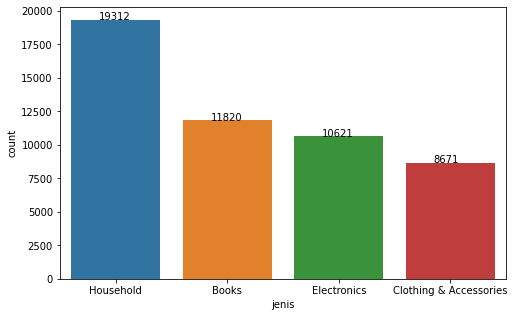

In [11]:
# Creating the barplot to know how many data each category has

plt.figure(figsize=(8,5))
ax = sns.countplot(x=dataecom["jenis"],  data=dataecom, order = dataecom["jenis"].value_counts().index )

for p, label in zip(ax.patches, dataecom["jenis"].value_counts()):   
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

Most of the goods from the dataset are classified as household category, followed by books, electronics and clothing & accessories

# Data Preparation

I am going to transform the data, specifically the 'jenis' column. I will use label encoder to transform the data from categorical into numeric. This will helps us to proceed to the next step later, which is modeling step

In [13]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataecom['encoded'] = labelencoder.fit_transform(dataecom['jenis'])

In [14]:
dataecom[['jenis','encoded']].value_counts()

jenis                   encoded
Household               3          19312
Books                   0          11820
Electronics             2          10621
Clothing & Accessories  1           8671
dtype: int64

Next I will create X and y variable for modeling. The X variable is 'deskripsi' column and it will acts as independent variable. Then, the y variable is 'encoded' column and it will be my dependent variable or the variable which contains the value that I want to predict

In [15]:
X = dataecom['deskripsi']
y = dataecom['encoded']

Before move on to the next step, don't forget to split the dataset into training and test dataset. For this problem, I decided to choose the test size 40% of the entire data. This number is like a common number in splitting data step 

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)

sss.get_n_splits(X, y)

1

In [17]:
for train_index, test_index in sss.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index] 

Since this project is involved with text data, It should have some function to process the text data

In [19]:
#function to convert all letter into lowercase
def convert_ke_lowercase(teks):
    return teks.str.lower()

#function to delete punctuations
def hapus_punctuations(teks):
    english_punctuation = string.punctuation
    translator = str.maketrans('','', english_punctuation)
    return str(teks).translate(translator)

#function to remove stopwords
def hapus_stopwords(teks):
    from nltk.corpus import stopwords
    stopwords = set(stopwords.words('english'))
    return " ".join([word for word in str(teks).split() if word not in stopwords])

#function to delete repeating character
def hapus_karakter_berulang(teks):
    return re.sub(r'(.)1+', r'1', teks)

#function to delete number from text
def hapus_numerik(teks):
    return re.sub('[0-9]+', '', teks)

#tokenization function
def tokenization(teks):
    tokenizer = RegexpTokenizer('\w+')
    teks = teks.apply(tokenizer.tokenize)
    return teks

#lemmatizing text function
#i.e, Converting some of the words to their root form. 
def lematization(teks):
    lm = WordNetLemmatizer()
    teks = [lm.lemmatize(word) for word in teks]
    return teks 

Finally, I will combine all of the functions before into one function

In [20]:
def preprocess(teks):
    teks = convert_ke_lowercase(teks)
    teks = teks.apply(lambda x : hapus_punctuations(x))
    teks = teks.apply(lambda x : hapus_stopwords(x))
    teks = teks.apply(lambda x : hapus_karakter_berulang(x))
    teks = teks.apply(lambda x : hapus_numerik(x))
    teks = tokenization(teks)
    teks = teks.apply(lambda x : lematization(x))
    teks = teks.apply(lambda x: " ".join(x))
    return teks

In [21]:
X_train = preprocess(X_train)

In [22]:
X_train

26636                                                                           trump think like billionaire
37698    newmom maternity legging seamless tummy support excellent stretchability newmom maternity leggin...
22143                                                           ugc netjrf exam solved paper psychology book
12302    masoom nx heavy base clear shot glass vodka tequila cordial espresso liqueur shot glass ml set h...
14098    nextgeek ac steam generator iron power cable plug core main cord lead universal core flexible br...
                                                        ...                                                 
4694     polyworm bernini wall oval mirror pwrmlargelavish gold timeless masterpiece bernini mirror itali...
30728    feeling good new mood therapy review book read reread los angeles timesa book read reread los an...
17953    blue heaven studio primer g makeup fixer mist sprayml combo primer lightweight formula silicone ...
9608     premium qu

In [23]:
#Transformasi data teks menggunakan tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(ngram_range= (1,2), max_features= 300000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=300000, ngram_range=(1, 2))

In [24]:
print(" No. of Feature words: ", len(vectoriser.get_feature_names()))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


 No. of Feature words:  300000


In [25]:
# Transforming The training data using the vectoriser
X_train = vectoriser.transform(X_train)

# Modeling

For the modeling, I am going to use some type of models, which are random forest and XGBoost. These models are really powerful and accurate to do classification task 

In [26]:
#Random Forest Model
from random import Random
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

random_forest_classifier = RandomForestClassifier(n_estimators= 10, criterion= 'entropy', random_state= 42)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [27]:
# XGBoost model
xgb_boost_classifier = XGBClassifier()
xgb_boost_classifier.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [28]:
#evaluasi performansi kedua model
from sklearn.metrics import accuracy_score

X_test = preprocess(X_test)
X_test = vectoriser.transform(X_test) 

random_forest_predictions = random_forest_classifier.predict(X_test)
xgb_predictions = xgb_boost_classifier.predict(X_test)

random_forest_score = accuracy_score(y_test, random_forest_predictions)
xgb_score = accuracy_score(y_test, xgb_predictions)

print("Random Forest Classifier Accuracy: ", random_forest_score * 100 , "%")
print("XGBoost Classifier Accuracy: ", xgb_score * 100 , "%")

Random Forest Classifier Accuracy:  95.25532969757064 %
XGBoost Classifier Accuracy:  87.96232027764006 %


Random Forest has better accuracy than XGBoost so I will use that to be my model to predict the category of goods

In [ ]:
def predict_custom(inp):
    inp = pd.Series(inp)
    inp = preprocess(inp)
    inp = [inp[0],]
    inp = vectoriser.transform(inp)
    prediction = random_forest_classifier.predict(inp)
    prediction = prediction[0]

    interpretations = {
        0 : "Books",
        1 : "Clothing and Accessories",
        2 : "Electronics",
        3 : "Household"
    }

    for i in interpretations.keys():
        if i == prediction:
            return interpretations[i]

# Test the result of model

In [ ]:
inp = "1-Sentence-Summary: Atomic Habits is the definitive guide to breaking bad behaviors and adopting good ones in four steps, showing you how small, incremental, everyday routines compound into massive, positive change over time"
print("prediction inp: ", predict_custom(inp))

prediction inp:  Books
